### Paola Della Foglia matr. 961014

# <span style="color:red"> Esercitazione numerica 1 </span>

## <span style="color:blue"> Esercizio 1.1</span>

#### Scopo
In questo primo esercizio testeremo il generatore di numeri pseudo-casuali scaricato dal portale Ariel dell'Università. Tramite esso, stimeremo il valor medio $\langle r \rangle = \int_0^1 r dr = 1/2$ e la varianza $\sigma^2 = \int_0^1 (r-1/2)^2 dr = 1/12$ di numeri casuali che seguono una distribuzione uniforme. Per far ciò, useremo un numero elevato di *esperimenti* $M$ ($M = 10^4$), ciascuno diviso in $N$ blocchi ( sfrutteremo il metodo dei blocchi o <i>blocking method</i>).
 
Dopodichè produrremo due grafici: uno per il valore stimato di $\langle r \rangle$ e $\langle (r-1/2)^2 \rangle$ la sua incertezza (che corrisponde alla devizione standard della media).

Nell'ultima parte dell'ex 1.1 genereremo $n=10^4$ numeri casuali, compresi tra 0 e 1, poi divideremo l'intervallo $\lbrack0,1\rbrack$ in $M=10^2$ sottointervalli e conteremo quanti numeri casuali $n_i$ cadono in ogni intervallo. Calcoliamo il valore del Chi quadro $\chi^2$: 
$$\chi^2 = \sum_{i=1}^M \frac{\left( n_i - n/M \right)^2}{n/M}$$
Il valor medio di aspettazione è il seguente: $(n_i - n/M)^2 \simeq n/M$ e il valor medio del $\chi^2$ dovrebbe essere uguale al numero di sottointervalli, ossia  $\chi^2 \simeq 100$.
Ripetiamo il calcolo 100 volte.

### Valor medio $\langle r \rangle$

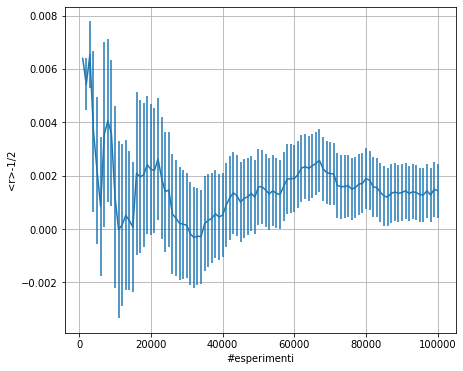

In [25]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import math
plt.rcParams['figure.figsize'] = [7,6]
#Grafico stima del valor medio e relativa incertezza di r, dove r è unif. tra (0,1)
x,y,error=np.loadtxt("ex01.1/Risultati1.txt",usecols=(0,1,2), delimiter=' ', unpack=True)
plt.errorbar(x,y-1/2,error) 
plt.xlabel('#esperimenti')
plt.ylabel('<r>-1/2')
plt.grid(True)
plt.show()

Sopra è riportato l'andamento del valor medio e della deviazione standard della media relative alla stima di⟨𝑟⟩.
Possiamo notare che il valor medio di $\langle r \rangle - 1/2$ converge a 0 quando il numero di esperimenti è elevato, prima di ciò il sistema è molto oscillante (fluttuazioni),  e le barre di errore si rimpiccioliscono in ampiezza proprio come ci si aspetterebbe.
Il valore 0 non è compreso nelle barre di errore, ciò non rappresenta un problema in quanto solo nel 68% dei casi questo valore è compreso in 1$\sigma$ sigma , mentre nel 95 % dei casi è compreso in 2$\sigma$ sigma (come nel nostro caso).
Quindi, possiamo concludere che il valore trovato è compatibile con $\langle r \rangle = \int_0^1 r dr = 1/2$.

### Varianza
Per calcolare la varianza $\sigma^2$, implementiamo lo stesso codice del punto precedente: si genera un numero $r$ (distribuito uniformemente tra 0 e 1) $\sigma^2 =  (r-1/2)^2$. Si ripete il calcolo precedente (valor medio e deviazione standard della media) per $\sigma^2$.

Ho prodotto un file di testo <font face = "Courier"> `Risultati2.txt` </font> e i risultati sono graficati sotto :


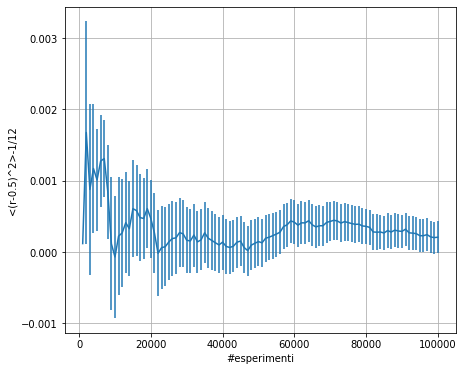

In [30]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import math
plt.rcParams['figure.figsize'] = [7,6]
x,y,error=np.loadtxt("ex01.1/Risultati2.txt",usecols=(0,1,2),delimiter=' ',unpack=True)
plt.errorbar(x,y-1/12,yerr=error)
plt.xlabel('#esperimenti')
plt.ylabel('<(r-0.5)^2>-1/12')
plt.grid(True)
plt.show()

Si osserva che il valor medio di $\langle (r-1/2)^2 \rangle - 1/12$ converge a zero quando <i>#esperimenti</i> diventa più grande, e le barre di errore decrescono in ampiezza, come ci aspettavamo. Questa volta, lo zero, è compreso nelle barre di errore, concludiamo quindi che $\sigma^2 = \langle (r-1/2)^2 \rangle = 1/12$ è compatibile con il valore stimato con il metodo Monte Carlo.

### $\chi^2$ test
Di seguito plottiamo i 100 valori del $\chi^2$ che abbiamo calcolato.

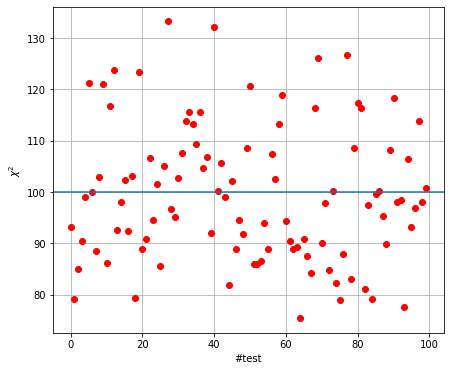

In [3]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import math
plt.rcParams['figure.figsize'] = [7,6]
x,y=np.loadtxt("ex01.1/Risultati3.txt",usecols=(0,1),delimiter=' ',unpack=True)
plt.xlabel('#test')
plt.ylabel('$\chi^2$')
plt.plot(x,y,'ro')
plt.axhline(y=100)
plt.grid(True)
plt.show()

Si osserva che il 𝜒2 è distribuito attorno al valore 100, che è proprio il valore stimato per il 𝜒2. Le fluttuazioni che si osservano attorno al valore atteso del 𝜒2, sono da considerarsi accettabili.  Quindi, molto probabilmente, i numeri pseudo-casuali che abbiamo generato provengono da una distribuzione uniforme di numeri compresi tra 0 e 1. Se avessimo trovato per il 𝜒2 un valor medio molto più elevato sarebbe piuttosto improbabile che $𝑛_𝑖$ provenga da una distribuzione uniforme.

### Compilazione
Per compilare il codice salvato nella cartella<font face = "Courier"> ex 01.1 </font> si digita da shell unix il comando <font face = "Courier"> `$make` </font> e per eseguirlo digitiamo <font face = "Courier"> `$./main.exe` </font>. Per pulire i risultati del programma usiamo <font face = "Courier"> `$make clean`</font>. Dopo aver eseguito il codice vengono prodotti 3 file di output: 1) (<i>'Risultati1.txt'</i>) contiene il valor medio di r con le relative incertezze in funzione del numero di blocchi, 2) (<i>'Risultati2.txt'</i>) contiene i valori medi delle varianze, con le incertezze relative, infine 3) (<i>'CHI2.txt'</i>) contiene i valori del $\chi^2$.

## <span style="color:blue"> Esercizio 1.2</span>
### Scopo
Lo scopo di questo esercizio è di ampliare il generatore di numeri pseudo-casuali aggiungendo la possibilità di generare numeri di un dado classico (interi da 1 a 6), che seguono una distribuzione esponenziale, e una distribuzione di Lorentz. 
Per il primo caso (dado classico) generiamo un $double$ compreso tra $[1,6]$ e lo trasformiamo in una variabile $int$. Per gli altri due casi ci avvaliamo del metodo dell'inversa della distribuzione cumulativa.
Al fine di ottenere un numero distribuito secondo una distribuzione esponenziale $p(x)=\lambda e^{-\lambda x}$ con $x\in [0;+\infty]$ calcoliamo la funzione cumulativa:
$$ F(x) = \int_{0}^{x}p(t)dt=\int_{0}^{x}\lambda e^{-\lambda t}dt = -e^{-\lambda t}\bigg|_{t=0}^{t=x}=1-e^{-\lambda x}$$
e dopo ne calcoliamo l'inversa: 
$$F(x)=1-e^{-\lambda x} = y$$

$$1-y=e^{-\lambda x}$$

$$ x=-\frac{1}{\lambda}\ln(1-y) $$
In conclusione, se y proviene da una distribuzione uniforme tra $[0,1)$ ne consegue che x segue una distribuzione esponenziale.

Allo stesso modo calcoliamo la funzione cumulativa per la distribuzione di Lorentz e la invertiamo:
$$ F(x) = \int_{-\infty}^{x}\frac{1}{\pi}\frac{\Gamma}{(x-\mu)^2+\Gamma^2}= \frac{1}{\pi}\arctan\big(\frac{x-\mu}{\Gamma}\big)+\frac{1}{2} = y$$

$$x=\Gamma \tan \big[\pi \big(y-\frac{1}{2}\big) \big] +\mu$$

Per ogni caso generiamo $10^4$ numeri pseudo-casuali e li plottiamo in un istogramma. Poi generiamo altri $N*10^4$ numeri e li plottiamo in un istogramma $S_N=\frac{1}{N}\sum_{1}^{N}x_i$, con $x_i$ numeri pseudo-casuali prodotti da un dado secondo una distribuzione esponenziale o lorentziana e $N=2,10,100$ 

Per il Teorema del limite centrale ci si aspetta che per $N$ che diventa sempre più grande la distribuzione $S_N$ si avvicina all'una o all'altra distribuzione limite gaussiana.

### Compilazione
Il codice è nella cartella <font face = "Courier"> ex 01.2 </font>. Per compilarlo occore digitare da shell unix <font face = "Courier"> `$make` </font> ed eseguire con <font face = "Courier"> `$./main.exe` </font>. Si può anche usare il comando <font face = "Courier"> `$make clean`</font> per pulire. I tre file prodotti in output sono: 'DadoStandard.txt', 'DadoEsponenziale.txt' e 'DadoLorentziano.txt'.


$\textbf{Dado Standard}$

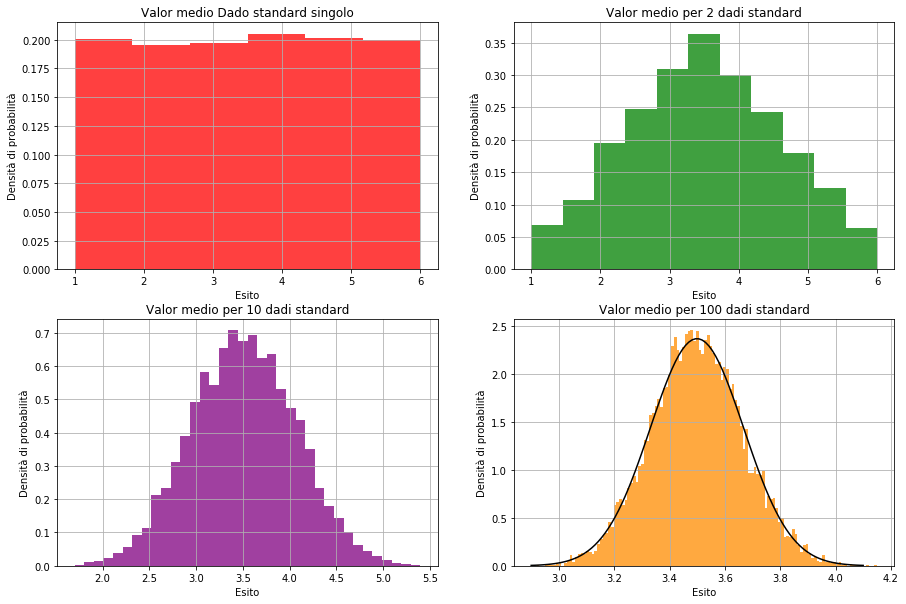

In [8]:
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as ss

with open("ex01.2/DadoStandard.txt") as f:
    dado1 = [float(next(f)) for x in range(10000)]
    dado2 = [float(next(f)) for x in range(10000)]
    dado10 = [float(next(f)) for x in range(10000)]
    dado100 = [float(next(f)) for x in range(10000)]

#Istogramma 1^caso
plt.rcParams['figure.figsize'] = [15, 10]
fig, ax = plt.subplots(2,2)

ax[0][0].hist(dado1,6,density=True, facecolor='red', alpha=0.75)
ax[0][1].hist(dado2,11,density=True, facecolor='green', alpha=0.75)
ax[1][0].hist(dado10,36, density=True, facecolor='purple', alpha=0.75)
ax[1][1].hist(dado100,124, density=True, facecolor='darkorange', alpha=0.75)

ax[0][0].set_title('Valor medio Dado standard singolo')
ax[0][1].set_title('Valor medio per 2 dadi standard')
ax[1][0].set_title('Valor medio per 10 dadi standard')
ax[1][1].set_title('Valor medio per 100 dadi standard')

for i in range(2):
    for j in range (2):
        ax[i][j].set_xlabel('Esito')
        ax[i][j].set_ylabel('Densità di probabilità')
        ax[i][j].grid(True) 

#Fit con la Gaussiana
P = ss.norm.fit(dado100)
rX = np.linspace(2.9,4.1, 100)
rP = ss.norm.pdf(rX, *P)
plt.plot(rX, rP, color='black')
plt.show()

Così come ci si aspetta, per il lancio di un singolo dado classico, si ha una distribuzione uniforme di numeri nell'intervallo [0,6], vedi (Fig.1 rossa), ma non appena aumentiamo $N$, il numero dei dadi lanciati, l'istogramma inizia ad assumere una forma gaussiana ( rispettivamente verde, viola e arancione). Quella arancione, originata da $S_{100} = 1/100 \sum_{i=1}^{100}x_i$ con $x_i$ un intero compreso tra 1 e 6, fitta molto bene con la Gaussiana ( vedi linea nera) così come predetto dal Teorema del limite Centrale.

$\textbf{Dado Esponenziale}$

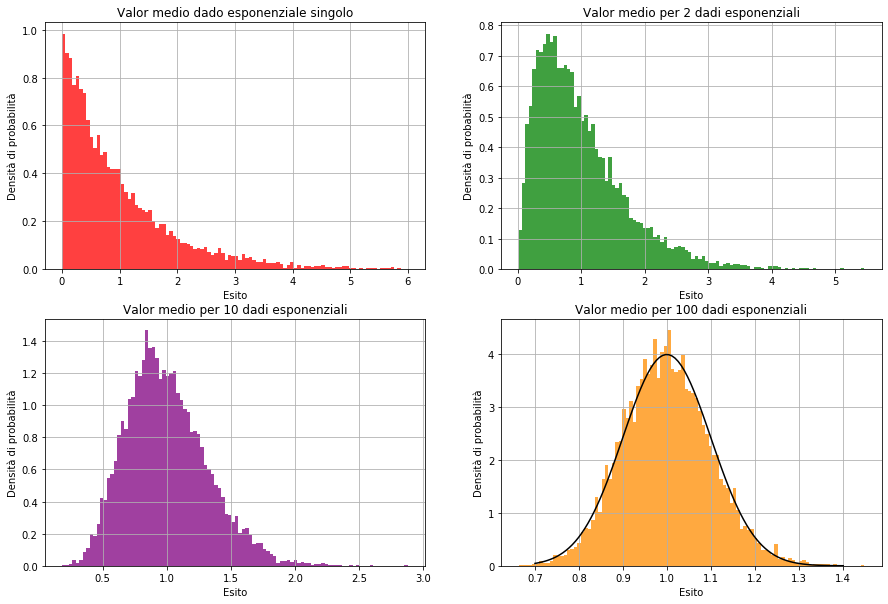

In [11]:
import matplotlib
import numpy as np
import matplotlib.pyplot as plt

with open("ex01.2/DadoEsponenziale.txt") as f:
    exp_1 = [float(next(f)) for x in range(10000)]
    exp_2 = [float(next(f)) for x in range(10000)]
    exp_10 = [float(next(f)) for x in range(10000)]
    exp_100 = [float(next(f)) for x in range(10000)]

# the histogram of the data
plt.rcParams['figure.figsize'] = [15, 10]
fig, ax = plt.subplots(2,2)

ax[0][0].hist(exp_1, 100, range = [0,6], density=True, facecolor='red', alpha=0.75)
ax[0][1].hist(exp_2, 100, density=True, facecolor='green', alpha=0.75)
ax[1][0].hist(exp_10, 100, density=True, facecolor='purple', alpha=0.75)
ax[1][1].hist(exp_100, 100, density=True, facecolor='darkorange', alpha=0.75)

ax[0][0].set_title('Valor medio dado esponenziale singolo')
ax[0][1].set_title('Valor medio per 2 dadi esponenziali')
ax[1][0].set_title('Valor medio per 10 dadi esponenziali')
ax[1][1].set_title('Valor medio per 100 dadi esponenziali')

for i in range(2):
    for j in range (2):
        ax[i][j].set_xlabel('Esito')
        ax[i][j].set_ylabel('Densità di probabilità')
        ax[i][j].grid(True)

#fit with a gaussian
P_exp = ss.norm.fit(exp_100)
rX_exp = np.linspace(0.7,1.4, 100)
rP_exp = ss.norm.pdf(rX_exp, *P_exp)
plt.plot(rX_exp, rP_exp, color='black')        
plt.show()

Nel primo caso (vedi Fig.1 blu) consideriamo una sola variabile esponenziale: l'istogramma prodotto segue una distribuzione esponenziale, ciò significa che abbiamo implementato correttamente il generatore per una distribuzione esponenziale. Nel momento in cui aumentiamo  𝑁 , il numero dei dadi lanciati, o numero delle variabili tra cui si calcola $S_N$ il profilo dell'istogramma inizia ad assumere un profilo gaussiano (Teorema del limite centrale, CLT).

$\textbf{Dado Lorentziano}$

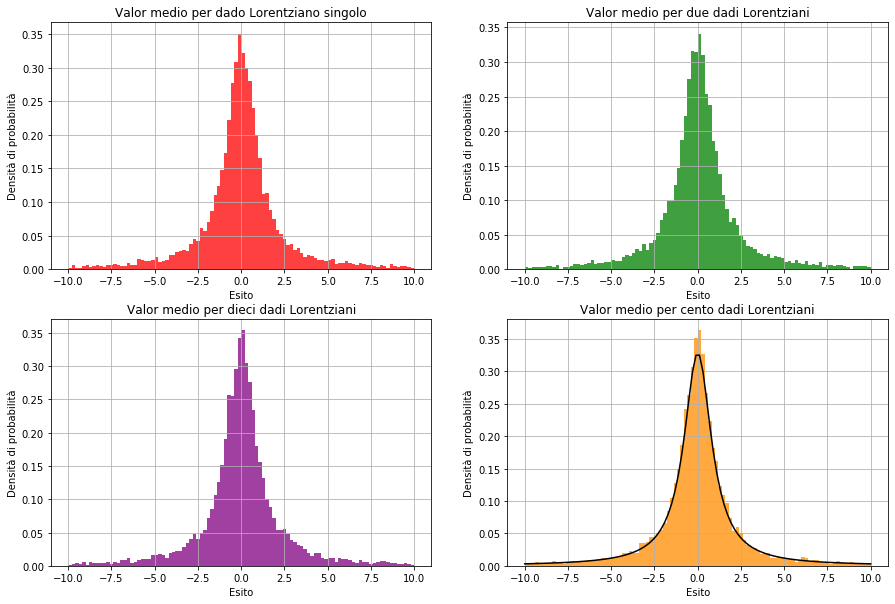

In [36]:
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as ss

with open("ex01.2/DadoLorentziano.txt") as f:
    lorentz1 = [float(next(f)) for x in range(10000)]
    lorentz2 = [float(next(f)) for x in range(10000)]
    lorentz10 = [float(next(f)) for x in range(10000)]
    lorentz100 = [float(next(f)) for x in range(10000)]

#Istogramma 3^caso
plt.rcParams['figure.figsize'] = [15, 10]
fig, ax = plt.subplots(2,2)

ax[0][0].hist(lorentz1, 100, range = [-10, 10] , density=True, facecolor='red', alpha=0.75)
ax[0][1].hist(lorentz2, 100,  range = [-10, 10] ,density=True, facecolor='green', alpha=0.75)
ax[1][0].hist(lorentz10, 100, range = [-10, 10] ,density=True, facecolor='purple', alpha=0.75)
ax[1][1].hist(lorentz100, 100, range = [-10, 10] ,density=True, facecolor='darkorange', alpha=0.75)

ax[0][0].set_title('Valor medio per dado Lorentziano singolo')
ax[0][1].set_title('Valor medio per due dadi Lorentziani')
ax[1][0].set_title('Valor medio per dieci dadi Lorentziani')
ax[1][1].set_title('Valor medio per cento dadi Lorentziani')

for i in range(2):
    for j in range (2):
        ax[i][j].set_xlabel('Esito')
        ax[i][j].set_ylabel('Densità di probabilità')
        ax[i][j].grid(True)

#Fit Lorentziano
P_lorentz = ss.cauchy.fit(lorentz100)
rX_lorentz = np.linspace(-10,10, 100)
rP_lorentz = ss.cauchy.pdf(rX_lorentz, *P_lorentz)
plt.plot(rX_lorentz, rP_lorentz, color='black')        
plt.show()

In questo caso la distribuzione $S_N$, al crescere di $N$ non si avvicina ad una distribuzione gaussiana, ma ad una lorentziana. Questo è solo un esempio per cui la distribuzione gaussiana non è quella limite per $N\to \infty$. L'estensione del CLT afferma che ci sono infinitamente molti attrattori nello spazio funzionale dei pdf.

## <span style="color:blue"> Esercizio 1.3</span>
### Scopo
Lo scopo di questo esercizio è quello di simulare l'esperimento di Buffon: un ago di lunghezza $L$ viene lanciato a caso su di un piano orizzontale secondo linee rette  a distanza $d$ tra loro (con $d > L$, ma non $d\gg L$ altrimenti $P\ll 1$). La probabilità $P$ che l'ago intersechi una di queste linee è : $P = 2L/\pi d$. Ciò può essere utilizzato per valutare $\pi$ tramite i lanci dell'ago: se l'ago vien lanciato $N_{thr}$ volte e si osserva che cade su una linea $N_{hit}$ di queste volre, possiamo ottenre una stima di $\pi$ da:
$$\pi = \frac{2L}{Pd} = \lim_{N_{thr} \to \infty}\frac{2LN_{thr}}{N_{hit}d}$$

$\textbf{Nota}$: per lanciare casualmente l'ago sul piano, dobbiamo generare un valore y_ per il centro e un  angolo ( non è necessario generare un valore x_ in quanto il problema è invariante sotto traslazione orizzontale). Siccome non conosciamo il valore iniziale dell'angolo non possiamo generarlo come variabile distribuita uniformemente tra 0 and $2\pi$. Quindi estraiamo un punto casuale all'interno di una circonferenza (si estrae un punto in una scatola $1\times1$ e se $r=\sqrt{x^2+y^2} > 1$ ne estraiamo un altro) l'angolo è dato da $\theta = \arctan(y/x)$ (si ottiene un angolo compreso tra $-\pi/2$ e $\pi/2$ e non tra $-\pi$ e $\pi$, ma ciò non rappresenta un problems. Per esempio, per $x=-\sqrt{2}/2, y=-\sqrt{2}/2$ otteniamo $\theta=\arctan(x/y)=\arctan(1)=\pi/4$ invece di $\theta=-3\pi/4$, ma indicano la stessa configurazione per l'ago poichè non c'è dipendenza dall'orientamento).

### Compilazione

Il codice è nella cartella <font face = "Courier"> ex 01.3 </font>. Per compilarlo occore digitare, da shell unix,  <font face = "Courier"> `$make` </font> ed eseguire con <font face = "Courier"> `$./main.exe` </font>.
I risultati saranno salvati su un file di output 'PIGreco.txt': nella prima colonna troviamo il numero di esperimenti effettuati, nella seconda le stime per i valori di Pi Greco e nell'ultima colonna le incertezze sulle stime di Pi Greco.

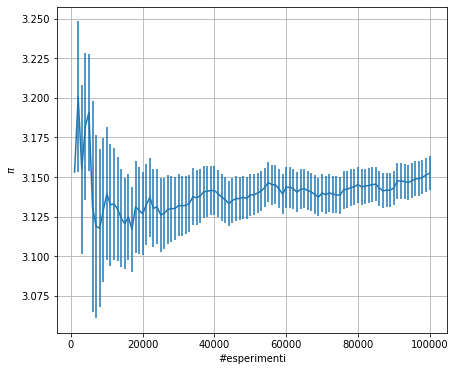

In [2]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import math
plt.rcParams['figure.figsize'] = [7, 6]
#Grafico stima del valore di Pi Greco e relativa incertezza.
x,PI_prog,PI_err_prog=np.loadtxt("ex01.3/PIGreco.txt",usecols=(0,1,2), delimiter=' ', unpack=True)
plt.errorbar(x,PI_prog,PI_err_prog) #
plt.xlabel('#esperimenti')
plt.ylabel('$\pi$')
plt.grid(True)
plt.show()

Ciò che deduciamo dal grafico è che il valore di $\pi$ trovato sperimentalmente è compatibile con il valore teorico di $\pi$ = 3.14 in quanto cade all'interno delle barre d'errore.